<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/06_CV/01_rectangle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import biblotek

from google.colab.patches import cv_imshow
import cv2
import imutils

cv2.__version__

'4.1.2'

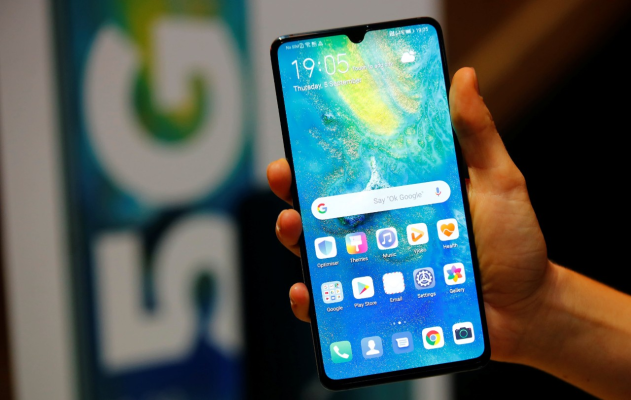

In [3]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv_imshow(image)

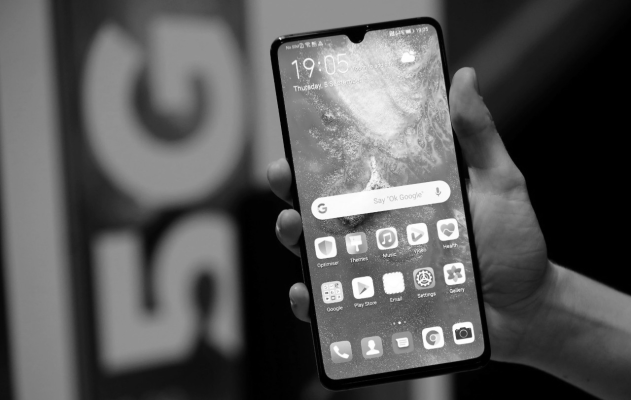

In [5]:
# konwersja do odcieni szarosci
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv_imshow(gray_image)

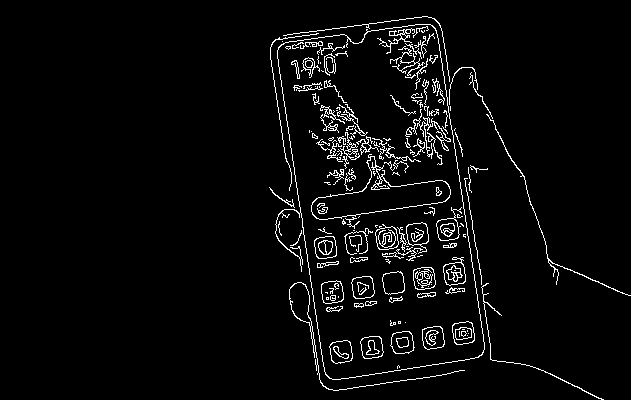

In [7]:
# detekcja krawędzi
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv_imshow(edges1)

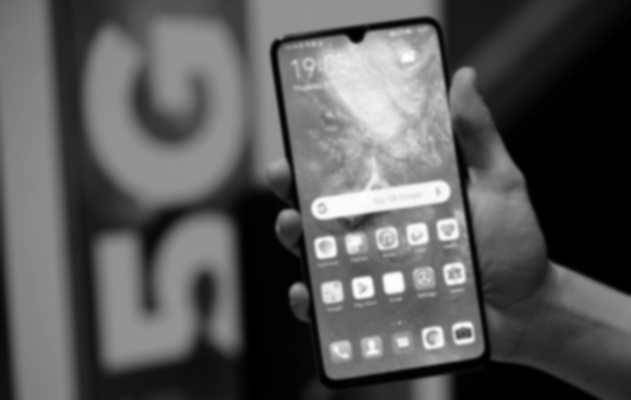

In [9]:
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5, 5), sigmaX=0)
cv_imshow(gray_image)

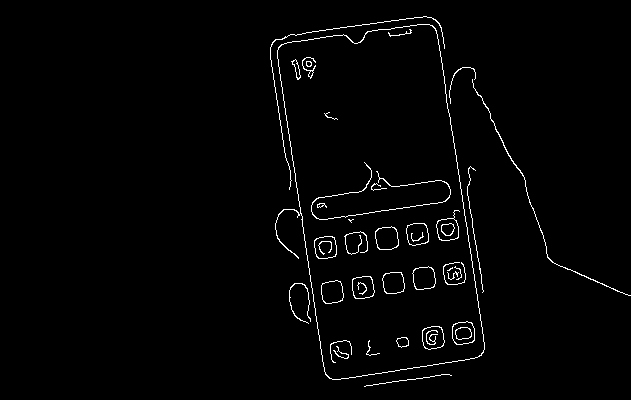

In [10]:
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv_imshow(edges)

In [0]:
# detekcja konturu
contours = cv2.findContours(image=edges.copy(),
                            mode=cv2.RETR_TREE, 
                            method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

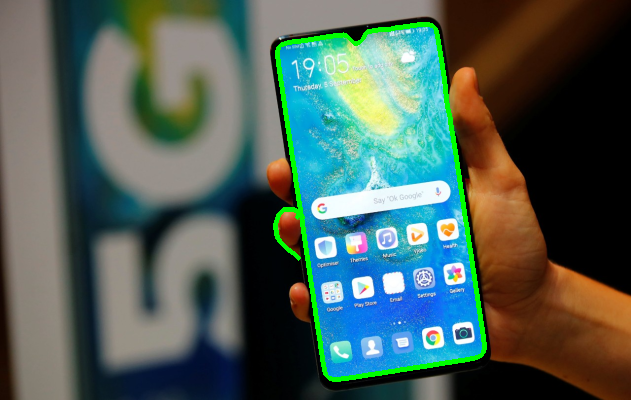

In [13]:
cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[0]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv_imshow(cnt1)

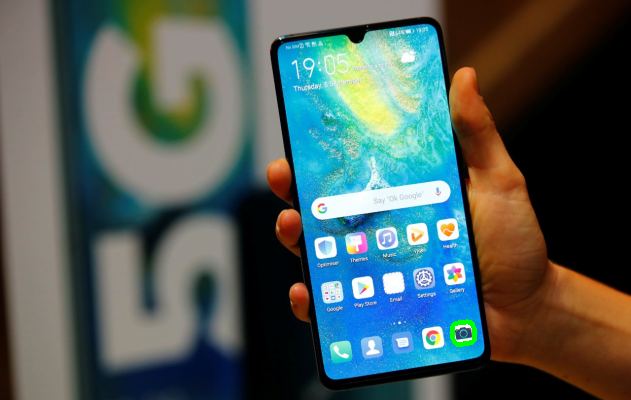

In [14]:
cnt2 = cv2.drawContours(image=image.copy(), contours=[contours[3]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv_imshow(cnt2)

In [0]:
# detekcja prostokątu
screen_contour = None

for contour in contours:
    perimeter = cv2.arcLength(curve=contour, closed=True)
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

    if len(approx) == 4:
        screen_contour = approx
        break

In [16]:
screen_contour

array([[[429,  24]],

       [[484, 349]],

       [[332, 379]],

       [[277,  50]]], dtype=int32)

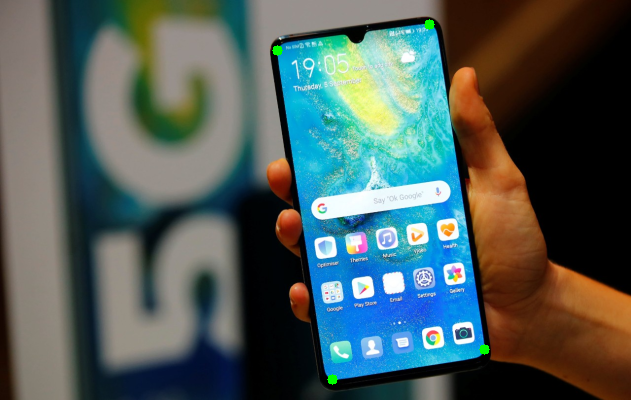

In [18]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv_imshow(vertices)